# Import Library

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

# Import Datasets

In [38]:
df = pd.read_csv('glass.csv')

In [39]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Train test Split

In [41]:
X = df.drop('Type', axis=1)
y = df['Type']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Preprocessing

In [43]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-7.27856681e-01, -5.06707738e-01,  6.33666459e-01,
         7.49225041e-02,  5.92980270e-01,  4.16641275e-01,
        -6.78380553e-01, -3.98084994e-01, -5.83516814e-01],
       [-1.58466912e+00, -5.30949014e-01, -1.76258389e+00,
         2.93338455e+00, -2.47478065e+00,  9.98745648e+00,
        -1.32769407e+00, -3.98084994e-01, -5.83516814e-01],
       [ 8.39331169e-01,  3.05374996e-01,  6.53859579e-01,
        -7.36262670e-01, -8.70889047e-01, -6.81648994e-01,
         3.25712517e-01, -3.98084994e-01, -5.83516814e-01],
       [-2.22649954e+00,  4.77789035e+00, -1.76258389e+00,
        -2.24274942e+00,  3.52071890e+00, -8.38547604e-01,
        -1.51512478e+00, -3.98084994e-01, -5.83516814e-01],
       [ 9.26570254e-01,  1.06897518e+00,  8.62521829e-01,
        -1.29636672e+00, -1.45643677e+00, -8.38547604e-01,
         3.85958101e-01, -3.98084994e-01, -5.83516814e-01],
       [-6.99815547e-01, -6.52155392e-01,  5.52893975e-01,
        -9.89028904e-02,  5.29333778e-01, -7.148773

# KNN

## find k's value

In [44]:
len(df)

214

In [45]:
judge = int(np.ceil(np.sqrt(len(df))))
judge

15

In [46]:
scores = []
for k in range(1, judge):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

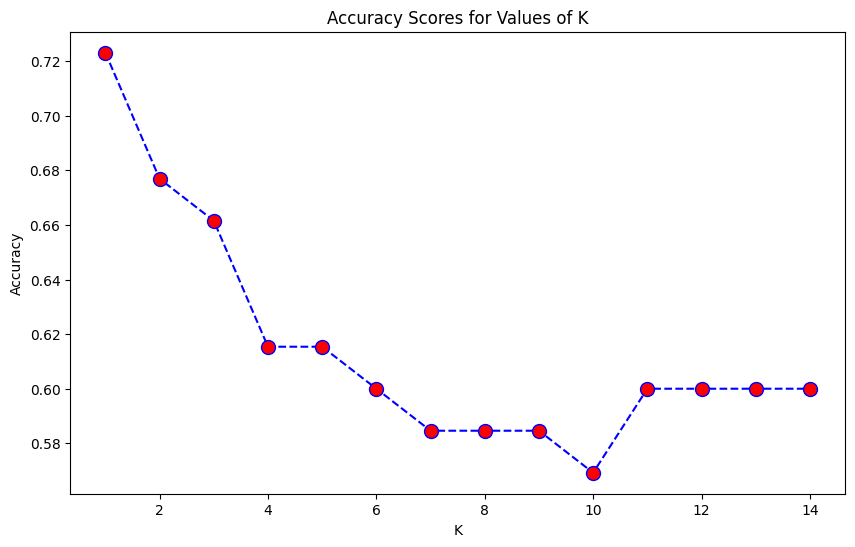

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, judge), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Scores for Values of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# KNN Algo

In [48]:
knn1 = KNeighborsClassifier(
    n_neighbors = 3,
    weights = 'distance',

    n_jobs=-1
)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [49]:
accuracy_score(y_test, knn1.predict(X_test))

0.676923076923077